In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
print(len(train_data))

8982


### one-hot编码

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[10])

[0. 1. 0. ... 0. 0. 0.]


In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_test_labels[10])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 构建model

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='elu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
x_train_partial = x_train[1000:]

y_val = one_hot_train_labels[:1000]
y_train_partial = one_hot_train_labels[1000:]

In [10]:
history = model.fit(x_train_partial,
                    y_train_partial,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-05-12 22:10:57.497665: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 2s 40ms/step - loss: 2.1853 - accuracy: 0.5415 - val_loss: 1.4309 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.3200 - accuracy: 0.7142 - val_loss: 1.1607 - val_accuracy: 0.7440
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0341 - accuracy: 0.7814 - val_loss: 1.0412 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8350 - accuracy: 0.8257 - val_loss: 0.9582 - val_accuracy: 0.8010
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6928 - accuracy: 0.8557 - val_loss: 0.9094 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5734 - accuracy: 0.8814 - val_loss: 0.8911 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4774 - accuracy: 0.8996 - val_loss: 0.8606 - val_accuracy: 0.8310
Epoch 8/20
16/16 [======

### 　绘制训练损失和验证损失

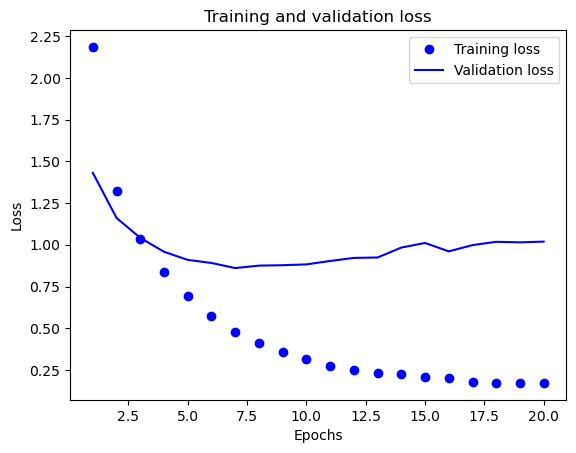

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

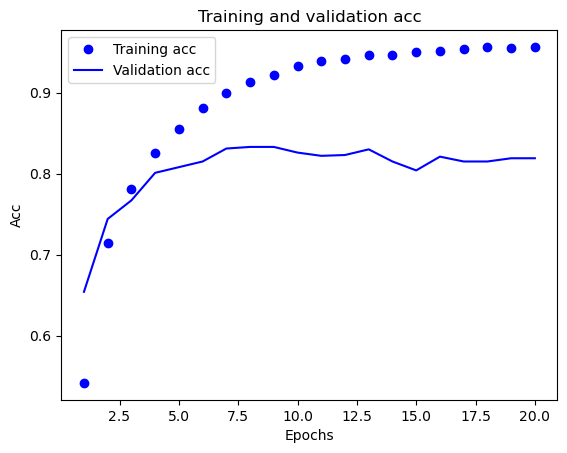

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()

plt.show()

In [13]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 1s 10ms/step - loss: 1.1813 - accuracy: 0.7992


In [14]:
results

[1.1812704801559448, 0.799198567867279]

In [15]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [16]:
predictions[0]

array([2.38333132e-06, 3.13928967e-06, 5.70864600e-08, 9.96539116e-01,
       2.58002291e-03, 7.47121192e-08, 7.63930018e-07, 2.43454963e-07,
       3.96844960e-04, 8.14261330e-06, 9.98256610e-07, 2.97214210e-05,
       1.05872095e-06, 3.26850363e-06, 1.18664570e-06, 1.02575562e-07,
       5.88759440e-06, 4.14042961e-06, 1.53036382e-07, 1.90921230e-04,
       1.82205957e-04, 2.52678201e-05, 6.23531591e-08, 6.18822560e-06,
       1.88102206e-06, 6.00169301e-07, 1.14969275e-07, 4.92246492e-08,
       2.30083231e-07, 7.67829590e-07, 2.46884838e-06, 1.73068955e-07,
       9.64003490e-08, 2.48682738e-07, 8.75877618e-07, 4.46420756e-07,
       1.30350270e-06, 5.79384540e-08, 4.45907148e-07, 7.44199269e-06,
       1.39840836e-07, 5.31046055e-07, 1.60902456e-08, 1.19262333e-08,
       6.04512040e-09, 1.11918119e-07], dtype=float32)

In [17]:
np.argmax(predictions[0])

3